In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pickle
import shutil

In [2]:
df = pd.read_csv(r"C:\Users\minli\Desktop\BINUS\SMT 4\Model Deployment\UTS\Dataset_A_loan.csv")

# Exploratory Data Analysis (Overview)

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
df = df.drop_duplicates().reset_index(drop=True)
cat_cols = []
num_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

In [8]:
print("Numerical: ", num_cols)
print()
print("Categorical: ", cat_cols)

Numerical:  ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

Categorical:  ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [9]:
cat_cols.append('loan_status')
num_cols.remove('loan_status')

In [10]:
for i in cat_cols:
    print(df[i].value_counts(),'\n')

person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64 

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64 

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64 

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64 

loan_status
0    35000
1    10000
Name: count, dtype: int64 



In [11]:
df['person_gender'] = df['person_gender'].replace({
    'Male': 'male',
    'fe male': 'female'
})

In [12]:
df.isnull().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64

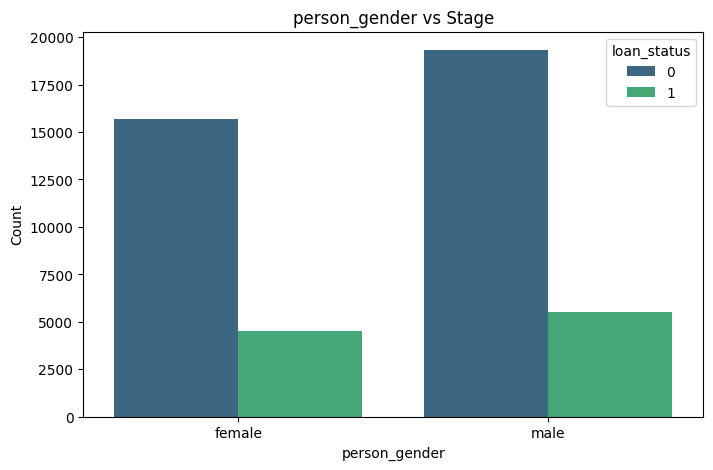

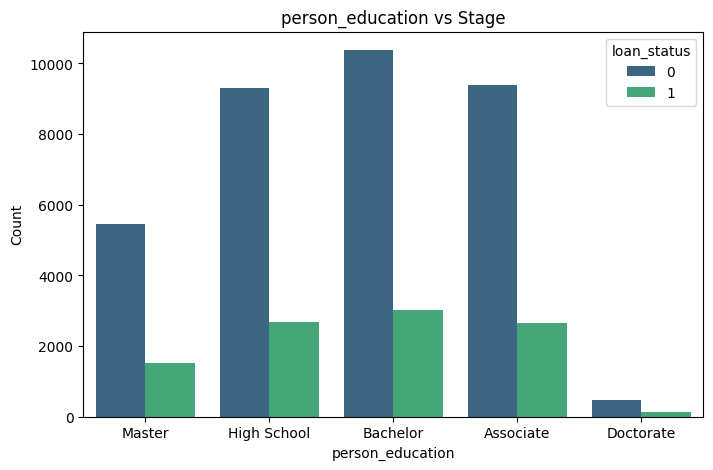

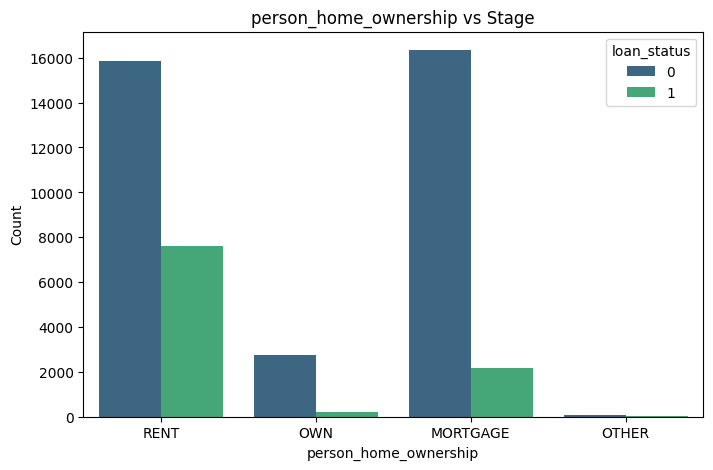

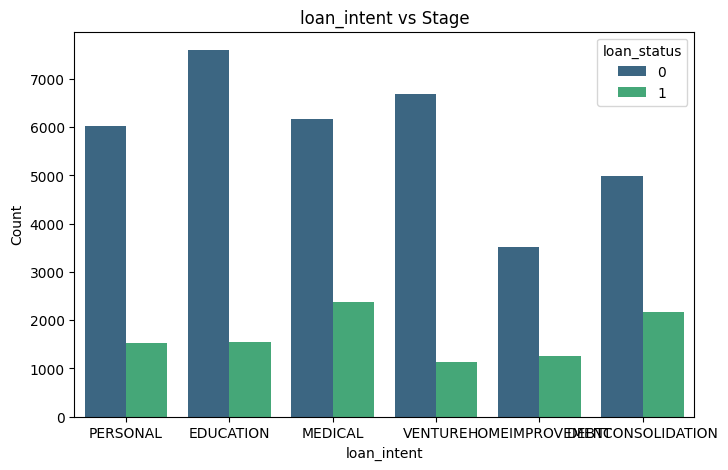

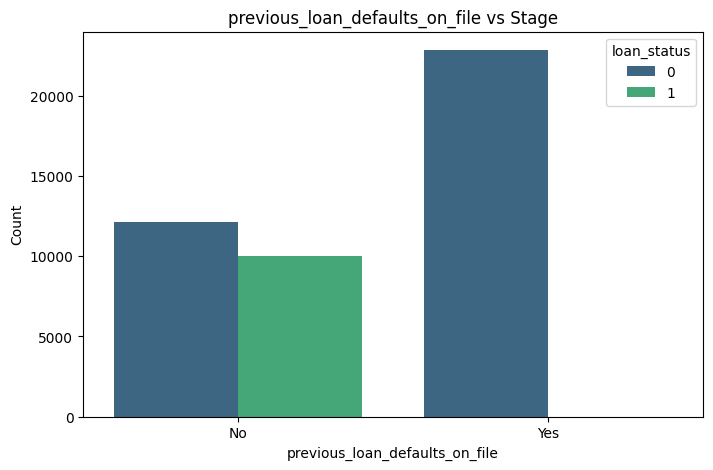

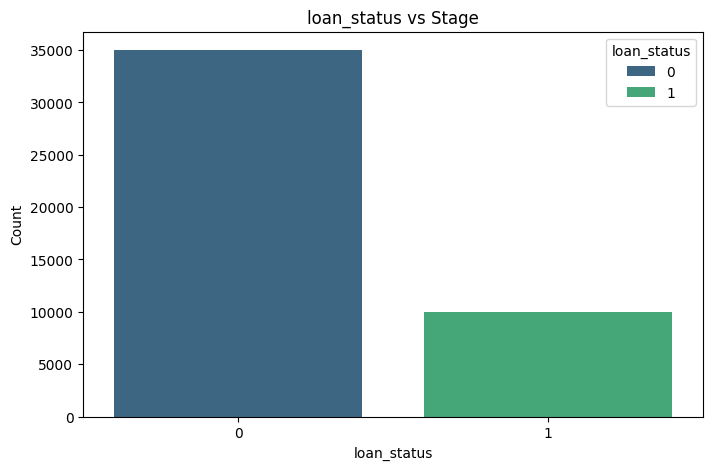

In [13]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='loan_status', data=df, palette='viridis')
    plt.title(f'{col} vs Stage')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='loan_status')
    plt.show()

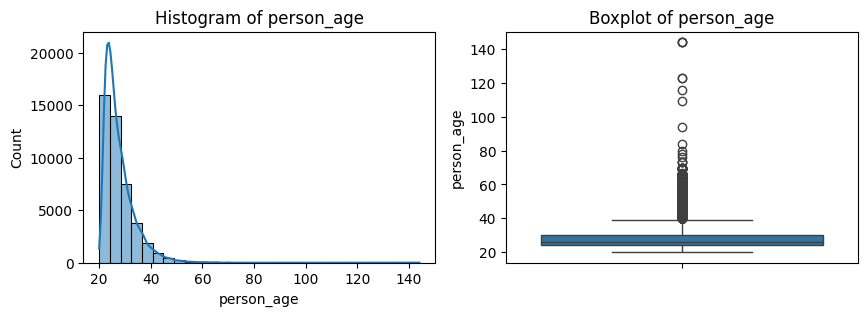

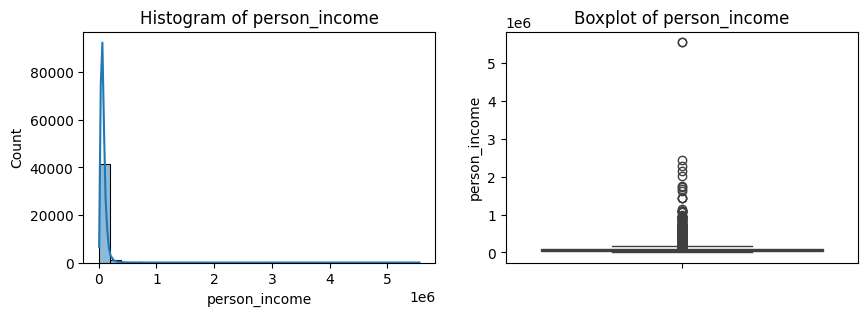

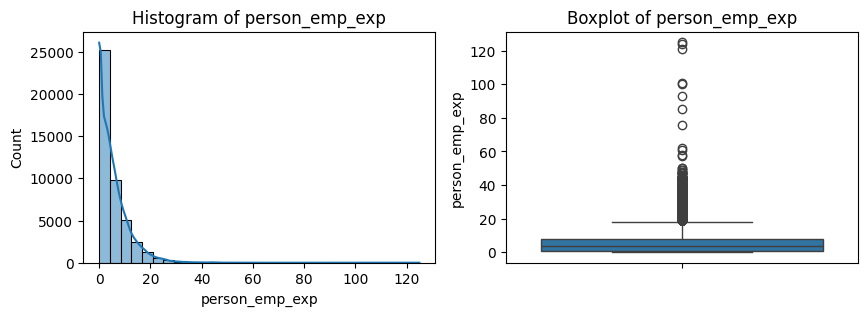

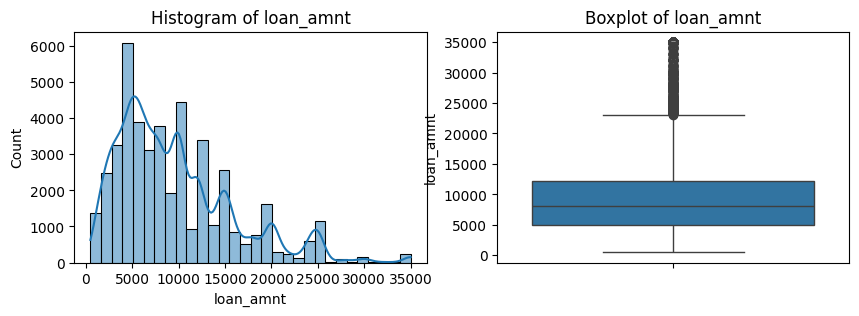

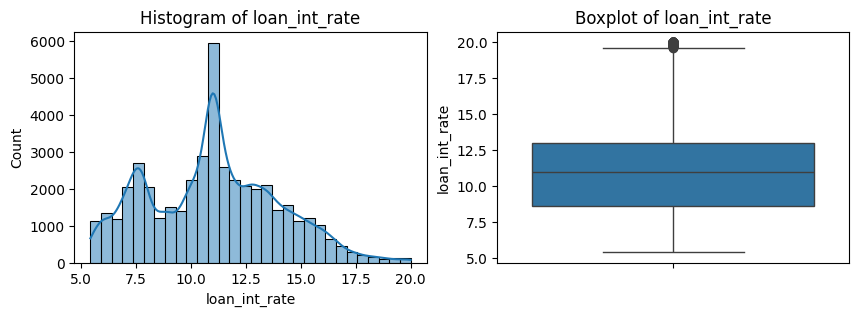

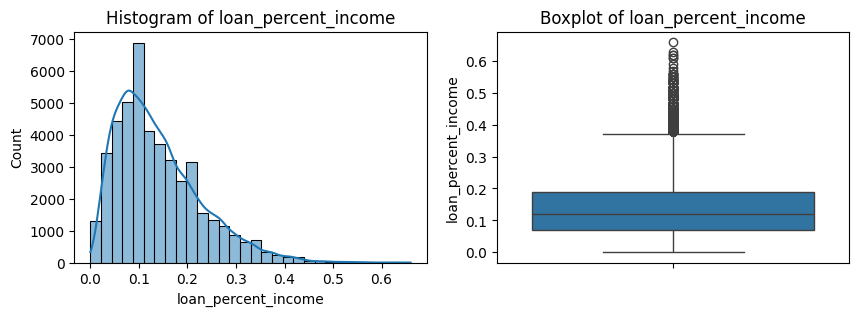

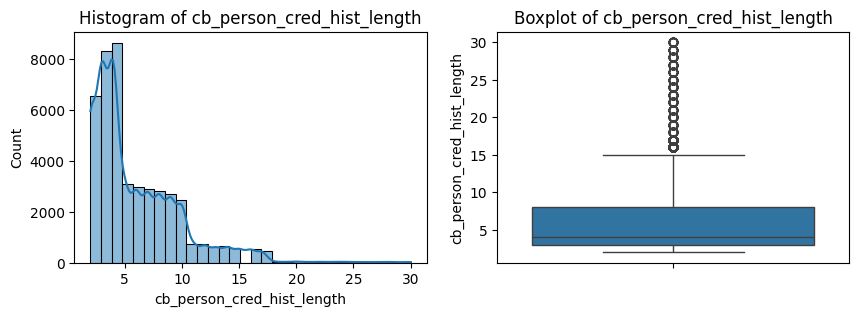

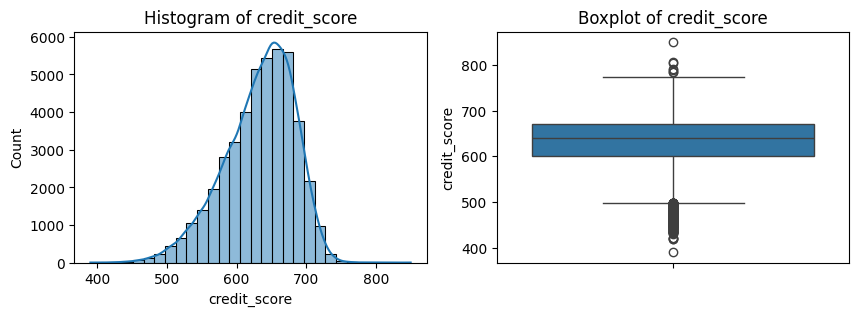

In [14]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        
        plt.show()

check_distribution_outliers(df[num_cols], num_cols)

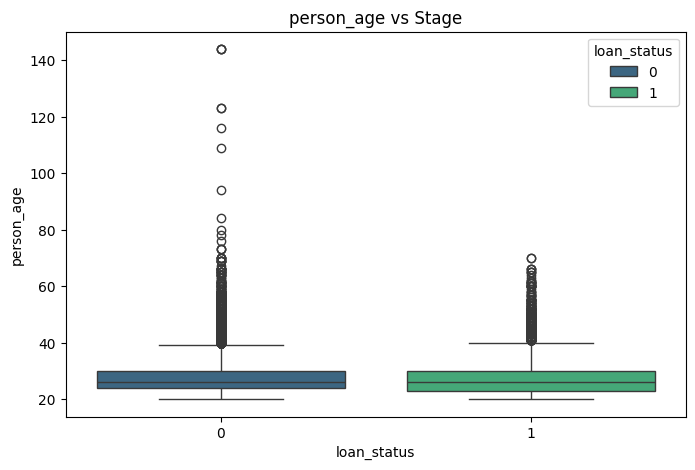

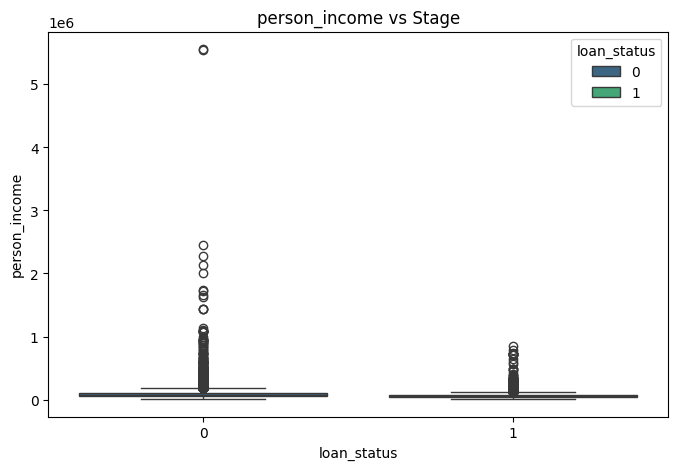

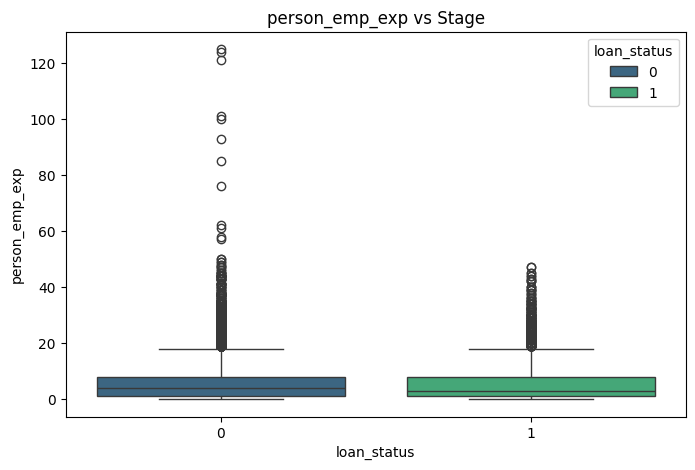

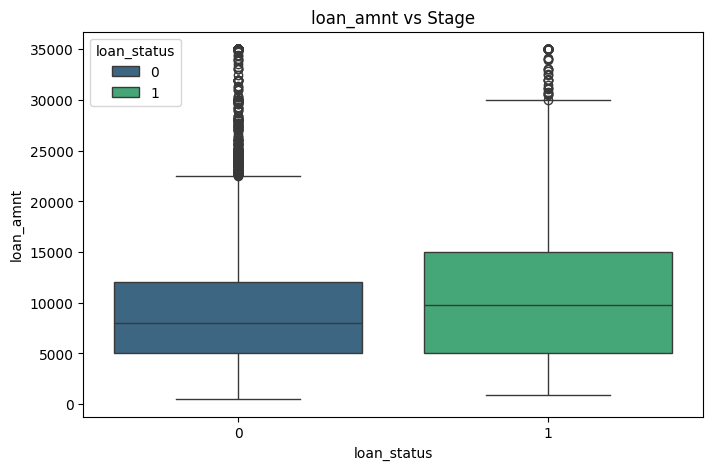

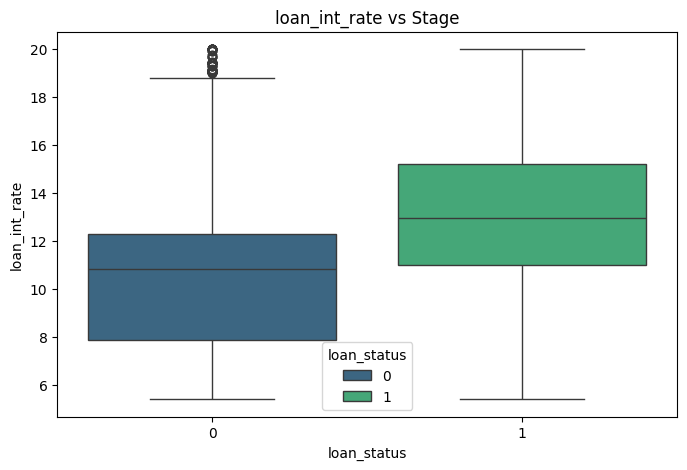

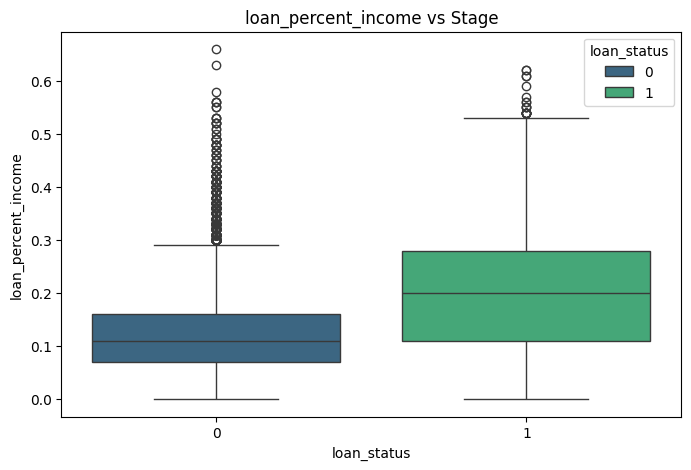

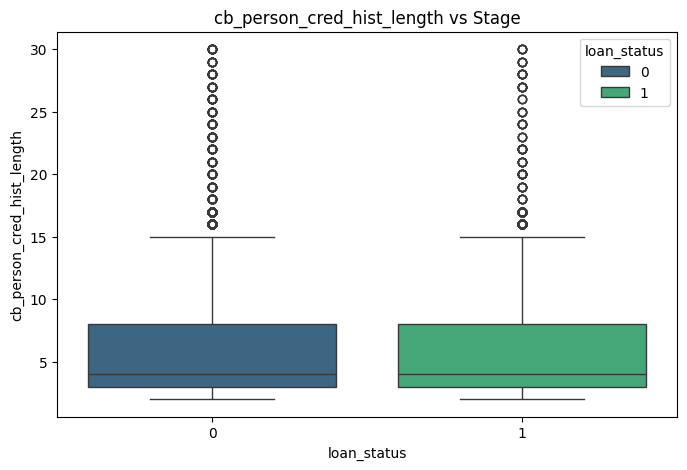

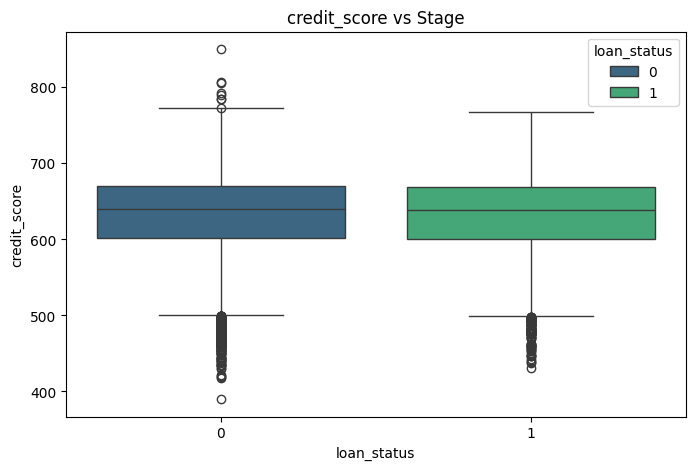

In [15]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='loan_status', y=col, data=df, hue='loan_status', palette='viridis')
    plt.title(f'{col} vs Stage')
    plt.xlabel('loan_status')
    plt.ylabel(col)
    plt.show()

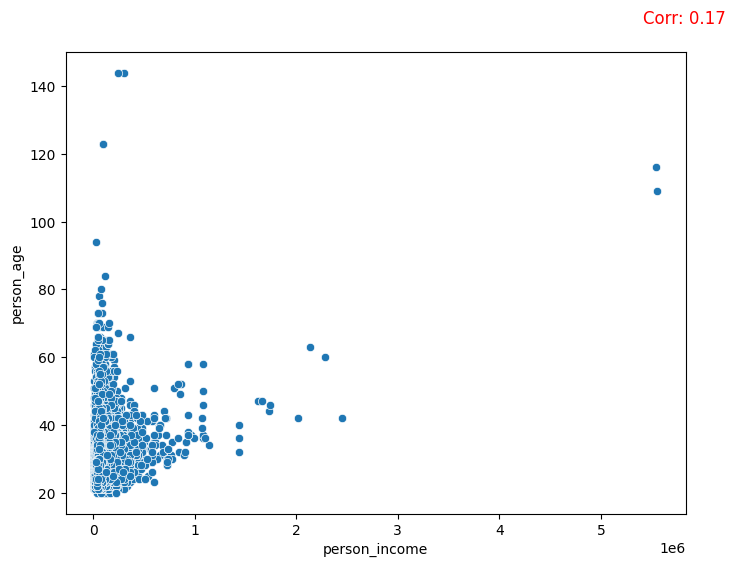

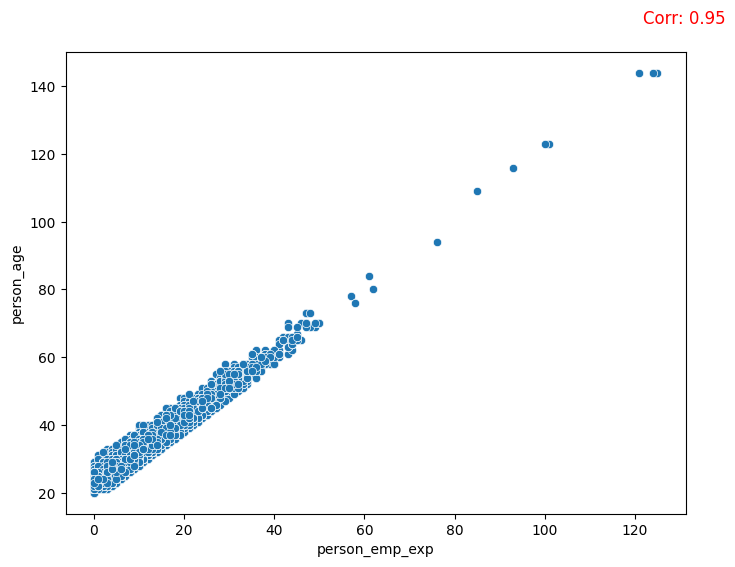

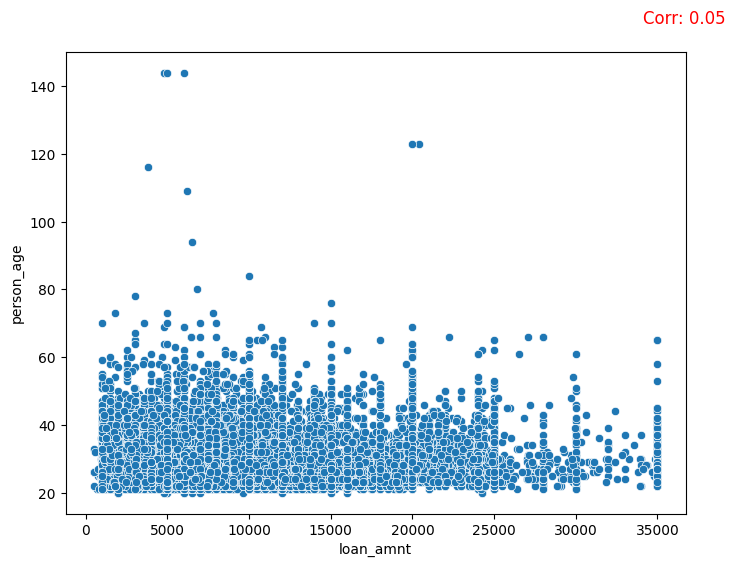

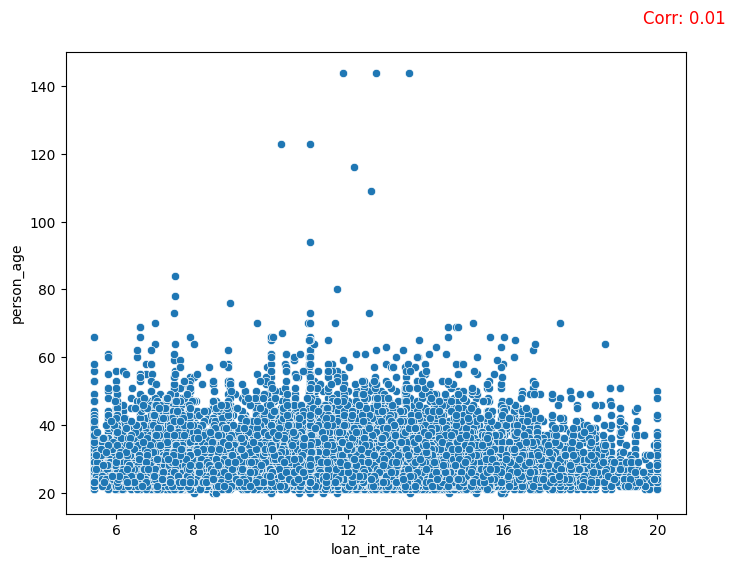

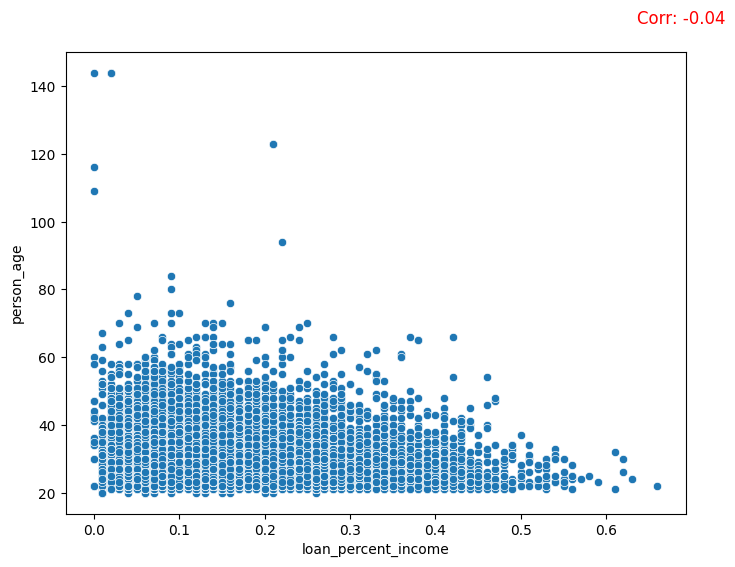

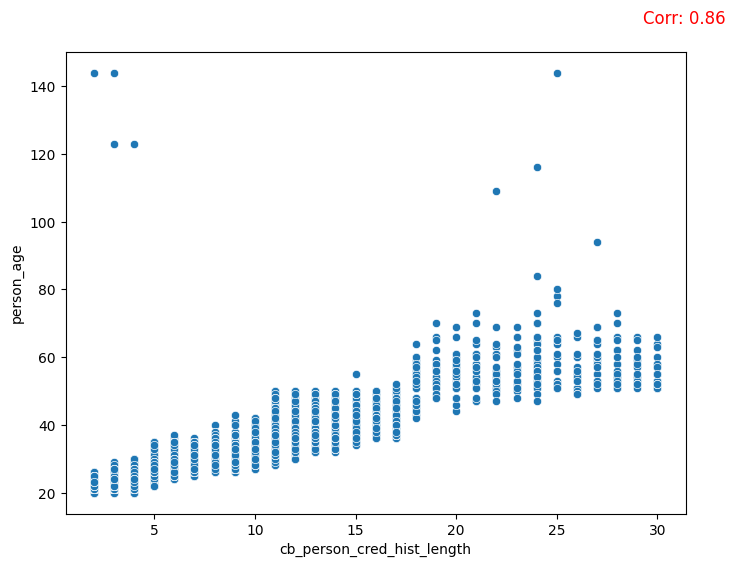

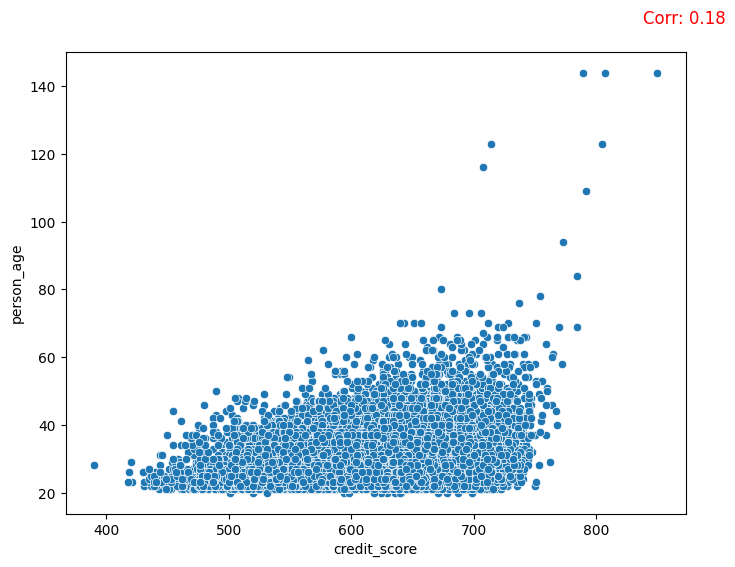

In [16]:
for col in [col for col in num_cols if col not in 'person_age']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y=df['person_age'])
    
    corr = df[col].corr(df['person_age'])
    
    plt.figtext(0.95, 0.95, f'Corr: {corr:.2f}', ha='right', va='top', fontsize=12, color='red')
    
    # Menampilkan plot
    plt.show()

# Exploratory Data Analysis (Preprocessing)

In [17]:
education_map = {
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4
}
df['person_education'] = df['person_education'].map(education_map)

df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})

In [18]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_features = ['person_home_ownership', 'loan_intent']

for feature in cat_features:
    encoded = encoder.fit_transform(df[[feature]])
    encoded_df = pd.DataFrame(
        encoded,
        columns=encoder.get_feature_names_out([feature]),
        index=df.index
    )
    df = pd.concat([df.drop(columns=[feature]), encoded_df], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   loan_amnt                       45000 non-null  float64
 6   loan_int_rate                   45000 non-null  float64
 7   loan_percent_income             45000 non-null  float64
 8   cb_person_cred_hist_length      45000 non-null  float64
 9   credit_score                    45000 non-null  int64  
 10  previous_loan_defaults_on_file  45000 non-null  int64  
 11  loan_status                     45000 non-null  int64  
 12  person_home_ownership_MORTGAGE  

In [19]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
median_age = x_train[x_train['person_age'] <= 100]['person_age'].median()
median_age_test = x_test[x_test['person_age'] <= 100]['person_age'].median()
x_train.loc[x_train['person_age'] > 100, 'person_age'] = median_age
x_test.loc[x_test['person_age'] > 100, 'person_age'] = median_age_test

median_exp = x_train[x_train['person_emp_exp'] <= 75]['person_emp_exp'].median()
median_exp_test = x_test[x_test['person_emp_exp'] <= 75]['person_emp_exp'].median()
x_train.loc[x_train['person_emp_exp'] > 75, 'person_emp_exp'] = median_exp
x_test.loc[x_test['person_emp_exp'] > 75, 'person_emp_exp'] = median_exp_test

In [21]:
imputer = SimpleImputer(strategy='median')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

In [22]:
scaler = RobustScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [23]:
print("Distribusi sebelum SMOTE:")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(x_test, y_test)

print("Distribusi setelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Distribusi sebelum SMOTE:
loan_status
0    28010
1     7990
Name: count, dtype: int64
Distribusi setelah SMOTE:
loan_status
0    28010
1    28010
Name: count, dtype: int64


# Modelling

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6990
           1       0.82      0.83      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.92      0.92      0.92      9000



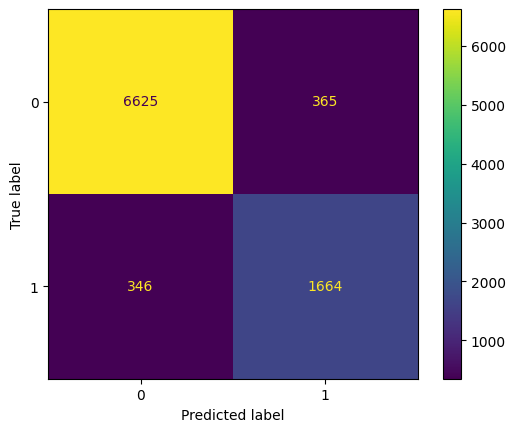

In [25]:
confusionMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusionMatrix).plot()

In [ ]:
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100]
}

xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')  

xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='f1_macro', verbose=0)
xgb_grid.fit(X_train_resampled, y_train_resampled)

best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

xgb_y_pred_adjusted = best_xgb.predict(x_test)

xgb_y_pred = xgb_y_pred_adjusted

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))

In [ ]:
pickle.dump(scaler, open("LoanScaler.pkl", "wb"))
pickle.dump(model, open("LoanPredictor.pkl", "wb"))

In [ ]:
shutil.copy("LoanScaler.pkl", r"C:\Users\minli\Downloads\LoanScaler.pkl")
shutil.copy("LoanPredictor.pkl", r"C:\Users\minli\Downloads\LoanPredictor.pkl")